In [2]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [3]:
img1 = np.array(Image.open("1.jpg").convert('L'), dtype='int64')
img2= np.array(Image.open("2.jpg").convert('L'), dtype='int64')
img3 = np.array(Image.open("3.png").convert('L'), dtype='int64')
img4 = np.array(Image.open("4.jpg").convert('L'), dtype='int64')
img5 = np.array(Image.open("5.jpg").convert('L'), dtype='int64')

# Histogram Equalization :

In [4]:
def CalculateHistogram(img):
    arr = np.zeros(256, dtype='int')
    
    for pixel in img.flatten():
        arr[pixel] += 1
    return arr

In [5]:
def CalculateCumulativeHistogram(inp):
    for i in range (1, len(inp)):
        inp[i] = inp[i] + inp[i-1]
    return inp

In [6]:
def CalculateEqualizedHistogram(inp):
    new_arr = np.zeros(256, dtype='int')
    
    for i in range (0, len(inp)):
        new_arr[i] = (255/(inp[len(inp) - 1] - inp[0]))*(inp[i] - inp[0])
    return new_arr
    

In [7]:
def CalculateEqualizedImage(img,inp):
    img = img.tolist()
    for row in img:
        for pixel in row:
            img[img.index(row)][row.index(pixel)] = inp[pixel]
    return img

# Optimal Thresholding :

In [8]:
def SegmentOptimalThresholding(img):
    img = np.array(img)
    shape = (img.shape[0]*img.shape[1])
    imgL  = img.tolist()
    Sum = 0
    for row in imgL:
        for pixel in row:
            Sum+=pixel
    first_back_ground_sum = (imgL[0][0]+imgL[0][-1]+imgL[-1][0]+img[-1][-1])
    first_mean_background = first_back_ground_sum/4
    first_totalNum_obj = shape-4
    first_obj_Sum = Sum - first_back_ground_sum
    first_mean_obj = first_obj_Sum/first_totalNum_obj
    thresh = (first_mean_background+first_mean_obj)/2
    prev_thresh = 0
    
    while prev_thresh!=thresh: 
        back_ground_sum = 0
        back_ground_number = 0
        
        obj_Sum = 0
        totalNum_obj = 0
        for i in range(0,len(img)):
            for j in range(0,len(img[i])):
                if img[i][j] > thresh:
                    obj_Sum += img[i][j]
                    totalNum_obj += 1
                else:
                    back_ground_sum += img[i][j]
                    back_ground_number += 1
                    
        mean_background = back_ground_sum/back_ground_number       
        mean_obj = obj_Sum/totalNum_obj
        
        prev_thresh = thresh
        thresh = (mean_background+mean_obj)/2
        
    for row in imgL:
            for pixel in row:
                if pixel >= thresh:
                    imgL[imgL.index(row)][row.index(pixel)] = 255
                else:
                    imgL[imgL.index(row)][row.index(pixel)] = 0
    return imgL


### Output for 1.jpg:

Segmenting the original Image:

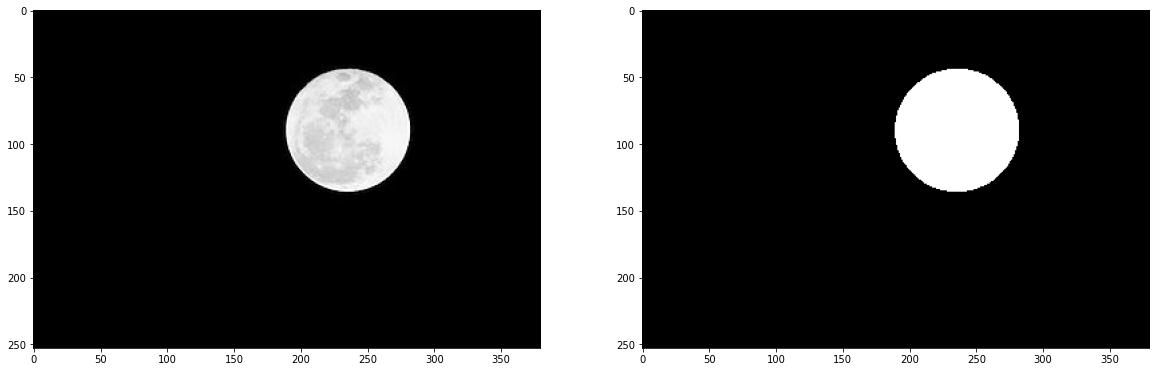

In [8]:
plt.subplots(nrows=1, ncols=2, figsize=(20, 20))
plt.subplot(2,2,1)
plt.imshow(img1, cmap = 'gray')

img = SegmentOptimalThresholding(img1)

#Plotting            
plt.subplot(2,2,2)
plt.imshow(img, cmap = 'gray')

Segmenting the equalized Image:

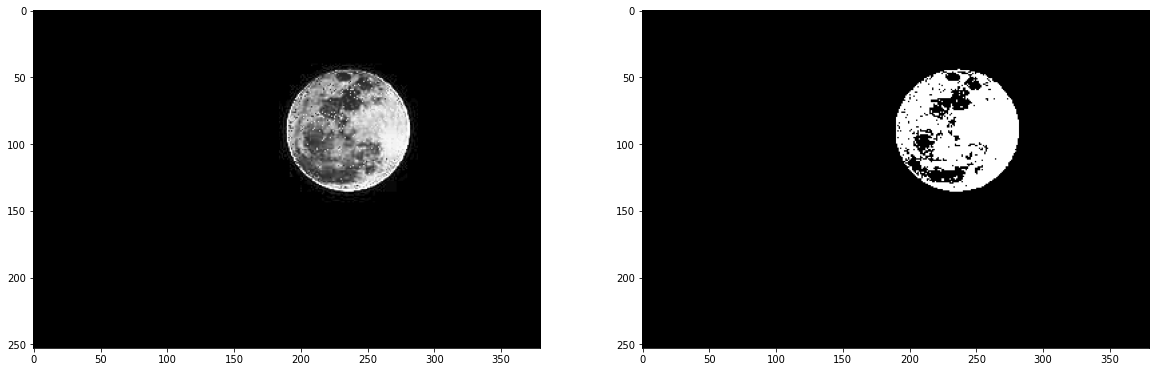

In [9]:
res = CalculateHistogram(img1)
res = CalculateCumulativeHistogram(res)
res = CalculateEqualizedHistogram(res)
res = CalculateEqualizedImage(img1,res)

plt.subplots(nrows=1, ncols=2, figsize=(20, 20))
plt.subplot(2,2,1)
plt.imshow(res, cmap = 'gray')

img = SegmentOptimalThresholding(res)

#Plotting            
plt.subplot(2,2,2)
plt.imshow(img, cmap = 'gray')

### Output for 2.jpg:

Segmenting the original Image:

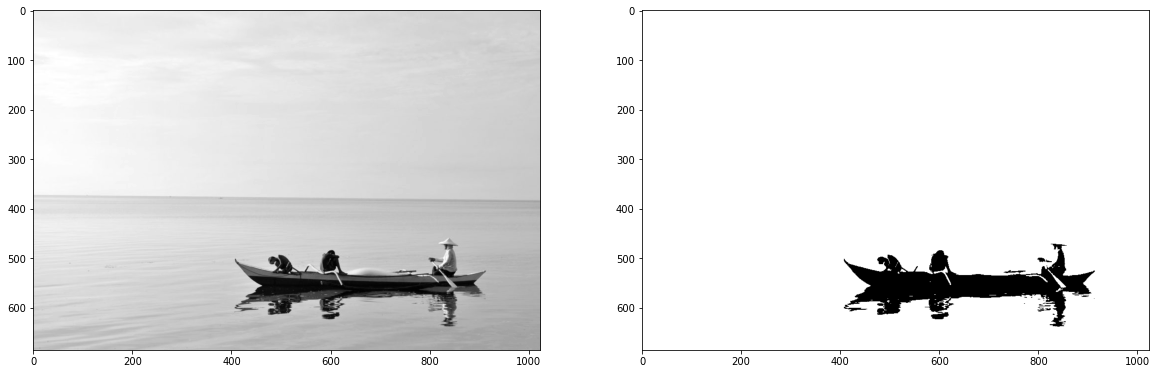

In [10]:
plt.subplots(nrows=1, ncols=2, figsize=(20, 20))
plt.subplot(2,2,1)
plt.imshow(img2, cmap = 'gray')

img = SegmentOptimalThresholding(img2)

#Plotting            
plt.subplot(2,2,2)
plt.imshow(img, cmap = 'gray')

Segmenting the equalized Image:

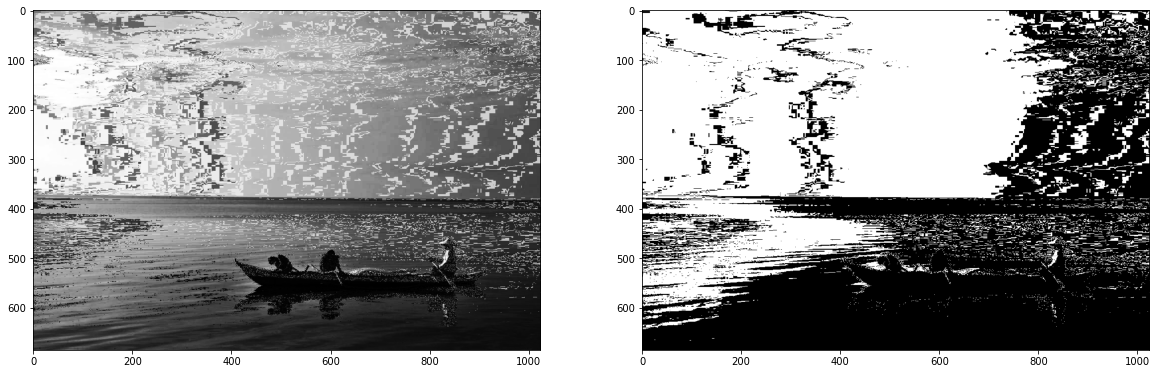

In [11]:
res = CalculateHistogram(img2)
res = CalculateCumulativeHistogram(res)
res = CalculateEqualizedHistogram(res)
res = CalculateEqualizedImage(img2,res)

plt.subplots(nrows=1, ncols=2, figsize=(20, 20))
plt.subplot(2,2,1)
plt.imshow(res, cmap = 'gray')

img = SegmentOptimalThresholding(res)

#Plotting            
plt.subplot(2,2,2)
plt.imshow(img, cmap = 'gray')

### Output for 3.jpg:

Segmenting the original Image:

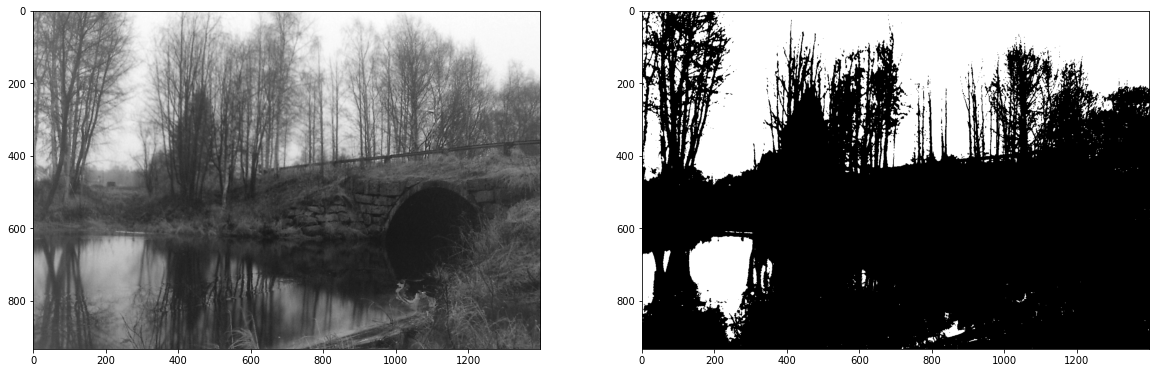

In [12]:
plt.subplots(nrows=1, ncols=2, figsize=(20, 20))
plt.subplot(2,2,1)
plt.imshow(img3, cmap = 'gray')

img = SegmentOptimalThresholding(img3)

#Plotting            
plt.subplot(2,2,2)
plt.imshow(img, cmap = 'gray')

Segmenting the equalized Image:

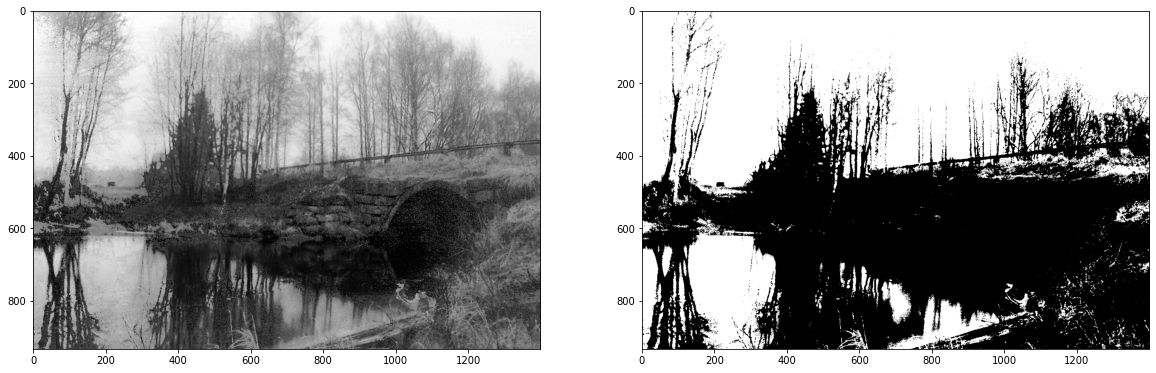

In [13]:
res = CalculateHistogram(img3)
res = CalculateCumulativeHistogram(res)
res = CalculateEqualizedHistogram(res)
res = CalculateEqualizedImage(img3,res)

plt.subplots(nrows=1, ncols=2, figsize=(20, 20))
plt.subplot(2,2,1)
plt.imshow(res, cmap = 'gray')

img = SegmentOptimalThresholding(res)

#Plotting            
plt.subplot(2,2,2)
plt.imshow(img, cmap = 'gray')

### Output for 4.jpg:

Segmenting the original Image:

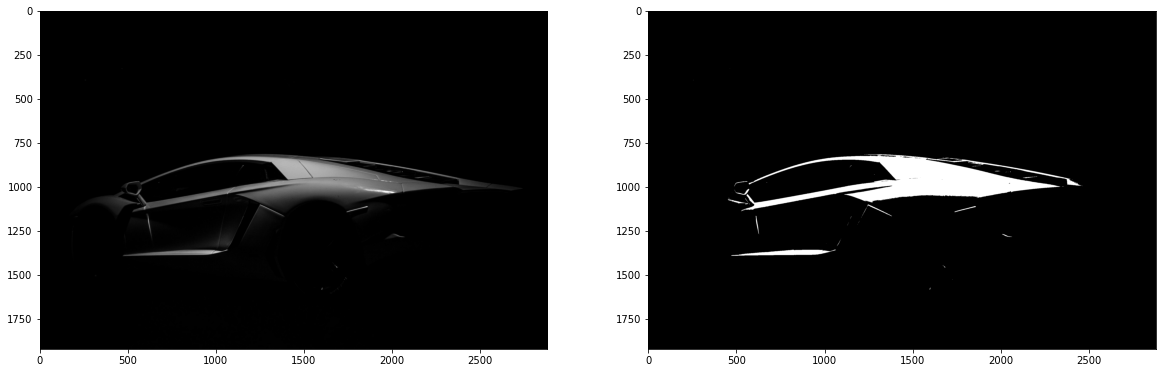

In [14]:
plt.subplots(nrows=1, ncols=2, figsize=(20, 20))
plt.subplot(2,2,1)
plt.imshow(img4, cmap = 'gray')

img = SegmentOptimalThresholding(img4)

#Plotting            
plt.subplot(2,2,2)
plt.imshow(img, cmap = 'gray')

Segmenting the equalized Image:

In [9]:
res = CalculateHistogram(img4)
res = CalculateCumulativeHistogram(res)
res = CalculateEqualizedHistogram(res)
res = CalculateEqualizedImage(img4,res)

plt.subplots(nrows=1, ncols=2, figsize=(20, 20))
plt.subplot(2,2,1)
plt.imshow(res, cmap = 'gray')

img = SegmentOptimalThresholding(res)

#Plotting            
plt.subplot(2,2,2)
plt.imshow(img, cmap = 'gray')

### Output for 5.jpg:

Segmenting the original Image:

In [ ]:
plt.subplots(nrows=1, ncols=2, figsize=(20, 20))
plt.subplot(2,2,1)
plt.imshow(img5, cmap = 'gray')

img = SegmentOptimalThresholding(img5)

#Plotting            
plt.subplot(2,2,2)
plt.imshow(img, cmap = 'gray')

Segmenting the equalized Image:

In [ ]:
res = CalculateHistogram(img5)
res = CalculateCumulativeHistogram(res)
res = CalculateEqualizedHistogram(res)
res = CalculateEqualizedImage(img5,res)

plt.subplots(nrows=1, ncols=2, figsize=(20, 20))
plt.subplot(2,2,1)
plt.imshow(res, cmap = 'gray')

img = SegmentOptimalThresholding(res)

#Plotting            
plt.subplot(2,2,2)
plt.imshow(img, cmap = 'gray')

# Comments: